In [1]:
def heaviside(x):
    if(x<0):
        return 0
    return 1

In [83]:
#A
import math
import numpy as np

def lag_inter(x,n): #returns lagrange poly evaluated at x
    xnodes = [round(-1+2*k/n, 3) for k in range(n+1)] #creates list of x nodes
    y = [round(heaviside(node),3) for node in xnodes] #list of f(xnodes)
    
    def lag_basis(k): #creates lagrange basis evaluated at given x
        basis = 1
        for j in range(len(xnodes)):
            if (j != k):
                basis *= (x-xnodes[j])/(xnodes[k]-xnodes[j])
        return basis
    
    basis_arr = [lag_basis(k) for k in range(len(xnodes))]
    px = np.dot(y,basis_arr)
    return px

In [84]:
def interpolant(n=5): #returns list[(x from -1 to 1, interpolant of x) ]
    px=[]
    ls = np.linspace(-1,1,100)
    print(f"A11_n{n}")
    for x in ls:
        px.append( (round(x,3),round(lag_inter(x,n),3)) )
    return px

In [85]:
interpolant(5)

A11_n5


[(-1.0, 0.0),
 (-0.98, 0.104),
 (-0.96, 0.189),
 (-0.939, 0.254),
 (-0.919, 0.304),
 (-0.899, 0.338),
 (-0.879, 0.359),
 (-0.859, 0.369),
 (-0.838, 0.368),
 (-0.818, 0.359),
 (-0.798, 0.342),
 (-0.778, 0.319),
 (-0.758, 0.29),
 (-0.737, 0.258),
 (-0.717, 0.222),
 (-0.697, 0.185),
 (-0.677, 0.146),
 (-0.657, 0.107),
 (-0.636, 0.068),
 (-0.616, 0.03),
 (-0.596, -0.007),
 (-0.576, -0.042),
 (-0.556, -0.074),
 (-0.535, -0.103),
 (-0.515, -0.13),
 (-0.495, -0.152),
 (-0.475, -0.171),
 (-0.455, -0.185),
 (-0.434, -0.196),
 (-0.414, -0.202),
 (-0.394, -0.203),
 (-0.374, -0.2),
 (-0.354, -0.193),
 (-0.333, -0.181),
 (-0.313, -0.165),
 (-0.293, -0.144),
 (-0.273, -0.12),
 (-0.253, -0.091),
 (-0.232, -0.059),
 (-0.212, -0.023),
 (-0.192, 0.016),
 (-0.172, 0.058),
 (-0.152, 0.104),
 (-0.131, 0.151),
 (-0.111, 0.201),
 (-0.091, 0.253),
 (-0.071, 0.306),
 (-0.051, 0.361),
 (-0.03, 0.416),
 (-0.01, 0.472),
 (0.01, 0.528),
 (0.03, 0.584),
 (0.051, 0.639),
 (0.071, 0.694),
 (0.091, 0.747),
 (0.111, 0.

In [86]:
interpolant(10)

A11_n10


[(-1.0, 0.0),
 (-0.98, 2.128),
 (-0.96, 3.153),
 (-0.939, 3.426),
 (-0.919, 3.219),
 (-0.899, 2.734),
 (-0.879, 2.119),
 (-0.859, 1.479),
 (-0.838, 0.882),
 (-0.818, 0.37),
 (-0.798, -0.036),
 (-0.778, -0.329),
 (-0.758, -0.515),
 (-0.737, -0.605),
 (-0.717, -0.616),
 (-0.697, -0.566),
 (-0.677, -0.472),
 (-0.657, -0.352),
 (-0.636, -0.222),
 (-0.616, -0.094),
 (-0.596, 0.022),
 (-0.576, 0.118),
 (-0.556, 0.189),
 (-0.535, 0.234),
 (-0.515, 0.251),
 (-0.495, 0.244),
 (-0.475, 0.216),
 (-0.455, 0.17),
 (-0.434, 0.111),
 (-0.414, 0.047),
 (-0.394, -0.02),
 (-0.374, -0.082),
 (-0.354, -0.136),
 (-0.333, -0.177),
 (-0.313, -0.203),
 (-0.293, -0.21),
 (-0.273, -0.199),
 (-0.253, -0.167),
 (-0.232, -0.117),
 (-0.212, -0.049),
 (-0.192, 0.035),
 (-0.172, 0.132),
 (-0.152, 0.239),
 (-0.131, 0.351),
 (-0.111, 0.467),
 (-0.091, 0.581),
 (-0.071, 0.692),
 (-0.051, 0.794),
 (-0.03, 0.886),
 (-0.01, 0.966),
 (0.01, 1.031),
 (0.03, 1.081),
 (0.051, 1.115),
 (0.071, 1.134),
 (0.091, 1.138),
 (0.111, 

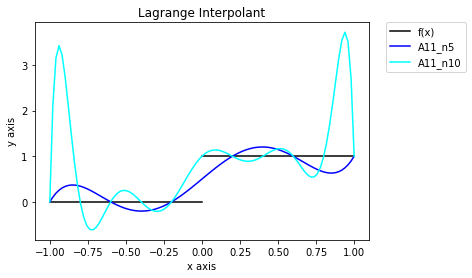

In [36]:
import matplotlib.pyplot as plt

plt.title('Lagrange Interpolant')
plt.xlabel('x axis')
plt.ylabel('y axis')

#plotting heaviside
plt.plot([-1,0],[0,0], color='black')
plt.plot([0,1],[1,1],color='black',label="f(x)")


data = interpolant(5)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
plt.plot(x_val,y_val,color='blue', label="A11_n5")

data = interpolant(10)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
plt.plot(x_val,y_val,color='cyan', label="A11_n10")

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.show()

In [103]:
#error
def error(n):
    error = 0
    data = interpolant(n)
    for x,y in data:
        if(x<0):
            error = max(error,abs(y)) #gets abs distance from heaviside @ x
        else:
            error = max(error,abs(y-1))
    print(f"max error for n={n} is {error}")
error(5)
error(10)
#error increased when n increased from 5 to 10

A11_n5
max error for n=5 is 0.472
A11_n10
max error for n=10 is 3.426


In [91]:
#B
import math
import numpy as np

def lag_inter_b(x,n): #returns lagrange poly evaluated at x
    xnodes = [-math.cos(k*math.pi/n) for k in range(n+1)] #creates list of x nodes
    y = [heaviside(node) for node in xnodes] #list of f(xnodes)
    
    def lag_basis(k): #creates lagrange basis evaluated at given x
        basis = 1
        for j in range(len(xnodes)):
            if (j != k):
                basis *= (x-xnodes[j])/(xnodes[k]-xnodes[j])
        return basis
    
    basis_arr = [lag_basis(k) for k in range(len(xnodes))]
    px = np.dot(y,basis_arr)
    return px

In [92]:
def interpolant_b(n): #returns list[(x from -1 to 1, interpolant of x) ]
    px=[]
    ls = np.linspace(-1,1,200)
    print(f"A11_n{n}")
    for x in ls:
        px.append( (x,round(lag_inter_b(x,n),3)) )
    return px

In [93]:
interpolant_b(20)

A11_n20


[(-1.0, 0.0),
 (-0.9899497487437185, 0.001),
 (-0.9798994974874372, -0.004),
 (-0.9698492462311558, -0.006),
 (-0.9597989949748744, -0.004),
 (-0.949748743718593, 0.001),
 (-0.9396984924623115, 0.005),
 (-0.9296482412060302, 0.009),
 (-0.9195979899497487, 0.01),
 (-0.9095477386934674, 0.008),
 (-0.8994974874371859, 0.004),
 (-0.8894472361809045, -0.001),
 (-0.8793969849246231, -0.006),
 (-0.8693467336683417, -0.01),
 (-0.8592964824120604, -0.013),
 (-0.8492462311557789, -0.014),
 (-0.8391959798994975, -0.013),
 (-0.8291457286432161, -0.01),
 (-0.8190954773869347, -0.005),
 (-0.8090452261306533, -0.0),
 (-0.7989949748743719, 0.006),
 (-0.7889447236180904, 0.011),
 (-0.778894472361809, 0.015),
 (-0.7688442211055276, 0.018),
 (-0.7587939698492463, 0.019),
 (-0.7487437185929648, 0.019),
 (-0.7386934673366834, 0.016),
 (-0.728643216080402, 0.012),
 (-0.7185929648241206, 0.007),
 (-0.7085427135678393, 0.001),
 (-0.6984924623115578, -0.005),
 (-0.6884422110552764, -0.012),
 (-0.67839195979899

In [94]:
interpolant_b(40)

A11_n40


[(-1.0, 0.0),
 (-0.9899497487437185, -0.001),
 (-0.9798994974874372, 0.002),
 (-0.9698492462311558, -0.001),
 (-0.9597989949748744, -0.003),
 (-0.949748743718593, 0.001),
 (-0.9396984924623115, 0.004),
 (-0.9296482412060302, 0.003),
 (-0.9195979899497487, -0.002),
 (-0.9095477386934674, -0.005),
 (-0.8994974874371859, -0.004),
 (-0.8894472361809045, 0.001),
 (-0.8793969849246231, 0.005),
 (-0.8693467336683417, 0.007),
 (-0.8592964824120604, 0.003),
 (-0.8492462311557789, -0.002),
 (-0.8391959798994975, -0.007),
 (-0.8291457286432161, -0.008),
 (-0.8190954773869347, -0.005),
 (-0.8090452261306533, -0.0),
 (-0.7989949748743719, 0.006),
 (-0.7889447236180904, 0.009),
 (-0.778894472361809, 0.009),
 (-0.7688442211055276, 0.005),
 (-0.7587939698492463, -0.001),
 (-0.7487437185929648, -0.007),
 (-0.7386934673366834, -0.01),
 (-0.728643216080402, -0.011),
 (-0.7185929648241206, -0.007),
 (-0.7085427135678393, -0.001),
 (-0.6984924623115578, 0.006),
 (-0.6884422110552764, 0.011),
 (-0.678391959

A11_n20
A11_n40


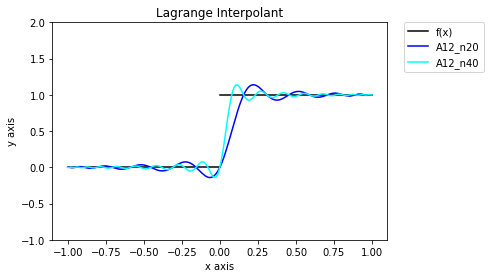

In [97]:
import matplotlib.pyplot as plt

plt.title('Lagrange Interpolant')
plt.xlabel('x axis')
plt.ylabel('y axis')

#plotting heaviside
plt.plot([-1,0],[0,0], color='black')
plt.plot([0,1],[1,1],color='black',label="f(x)")


data = interpolant_b(20)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
plt.plot(x_val,y_val,color='blue', label="A12_n20")

data = interpolant_b(40)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
plt.plot(x_val,y_val,color='cyan', label="A12_n40")

plt.gca().set_ylim([-1,2])
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.show()

In [104]:
#error
def error_b(n):
    error = 0
    data = interpolant_b(n)
    for x,y in data:
        if(x<0):
            error = max(error,abs(y)) #gets abs distance from heaviside @ x
        else:
            error = max(error,abs(y-1))
    print(f"max error for n={n} is {error}")
error_b(20)
error_b(40)
#error decreased when n is increased from 20 to 40

A11_n20
max error for n=20 is 0.977
A11_n40
max error for n=40 is 0.952


A21
(0.9,1.3)
(1.0252525252525253,1.3671026228616858)
(1.1505050505050505,1.4312854840585019)
(1.2757575757575759,1.4896288219255778)
(1.401010101010101,1.5404440016475032)
(1.5262626262626262,1.59095503766989)
(1.6515151515151514,1.6523089252196443)
(1.7767676767676768,1.7356696786212409)
(1.9020202020202022,1.8522012800169532)
(2.0272727272727273,2.005020777733754)
(2.1525252525252525,2.166941110594048)
(2.2777777777777777,2.3161171070309496)
(2.403030303030303,2.4463175477603922)
(2.5282828282828285,2.55227664611367)
(2.6535353535353536,2.6288654304850576)
(2.778787878787879,2.675503630126622)
(2.904040404040404,2.6971094470302477)
(3.029292929292929,2.6989231874246196)
(3.1545454545454543,2.685212477224227)
(3.27979797979798,2.6582700114626325)
(3.405050505050505,2.6201491204323735)
(3.5303030303030303,2.572903134425991)
(3.6555555555555554,2.5185853837360215)
(3.7808080808080806,2.459249198655005)
(3.906060606060606,2.3969478880860016)
(4.031313131313132,2.3335172877551154)
(4.156

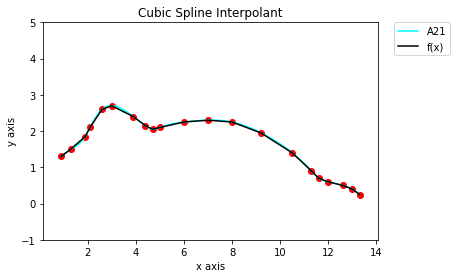

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import math

data =[(.9,1.3),(1.3,1.5),(1.9,1.85),(2.1,2.1),(2.6,2.6),(3.0,2.7),(3.9,2.4),(4.4,2.15),(4.7,2.05),(5.0,2.1),(6.0,2.25),(7.0,2.3),(8.0,2.25),(9.2,1.95),(10.5,1.4),(11.3,0.9),(11.6,0.7),(12.0,0.6),(12.6,0.5),(13.0,0.4),(13.3,0.25)]
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

def Cubic_inter(x,y):
    #Step 0: a-vector
    xnodes = x 
    ynodes = y #ynodes = a-vector
    
    n = len(ynodes)
    #step 1: c-vector
    h = []
    for i in range(0,len(ynodes)-1):
        h.append(ynodes[i+1]-ynodes[i])

    A = np.zeros((n,n))
    #Natural
    A[0][0] = 1
    for j in range(1,n-1):
        A[j][j-1] = h[j-1]
        A[j][j] = 2*(h[j-1]+h[j])
        A[j][j+1]= h[j]
    A[n-1][n-1] = 1

    F = np.zeros((n,1))
    for j in range(1,n-1):
        F[j] = 3*(ynodes[j+1]-ynodes[j])/h[j] - 3*(ynodes[j]-ynodes[j-1])/h[j-1]
    
    c = np.linalg.solve(A,F)

    #step 2: b-vector
    b = np.zeros((n,1))
    for j in range(0,n-1):
        b[j] = 1/h[j]*(ynodes[j+1]-ynodes[j]) - h[j]/3*(2*c[j]+c[j+1])
    
    #step 3: d-vector
    d = np.zeros((n,1))
    for j in range(0,n-1):
        d[j] = (c[j+1]-c[j]/(3*h[j]))
    
    #plotting
    ls = np.linspace(0.9,13.3,100)
    spline = []
    for i in ls:
        for j in range(0,len(xnodes)-1):
            if(i >= xnodes[j] and i <= xnodes[j+1]):
                sTemp = ynodes[j]+b[j]*(i-xnodes[j])+c[j]*(i-xnodes[j])**2+d[j]*(i-xnodes[j])**3
                spline.append((i, sTemp))
    
    print("A21")
    for x,y in spline:
        print(f"({x},{y})")
                
    xs = [x[0] for x in spline]
    ys = [x[1] for x in spline]
    plt.plot(xs,ys,color='cyan', label="A21")
    
    plt.title('Cubic Spline Interpolant')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    
    #plot given data points
    plt.scatter(x_val,y_val,color='red')
    plt.plot(x_val,y_val,color='black',label="f(x)")
    
    plt.gca().set_ylim([-1,5])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
    plt.show()
        
Cubic_inter(x_val,y_val)

In [130]:
#C
import math
import numpy as np

def lag_inter_c(x): #returns lagrange poly evaluated at x
    xnodes = x_val #list of x nodes
    y = y_val #list of f(xnodes)
    
    def lag_basis(k): #creates lagrange basis evaluated at given x
        basis = 1
        for j in range(len(xnodes)):
            if (j != k):
                basis *= (x-xnodes[j])/(xnodes[k]-xnodes[j])
        return basis
    
    basis_arr = [lag_basis(k) for k in range(len(xnodes))]
    px = np.dot(y,basis_arr)
    return px

In [132]:
ls = np.linspace(0.9,13.3,100)
px = [(round(x,3),round(lag_inter_c(x),3)) for x in ls]
print("A22:")
for x,y in px:
    print(f"({x},{y})")

A22:
(0.9,1.3)
(1.025,4.839)
(1.151,3.314)
(1.276,1.704)
(1.401,1.026)
(1.526,1.035)
(1.652,1.32)
(1.777,1.623)
(1.902,1.853)
(2.027,2.019)
(2.153,2.156)
(2.278,2.288)
(2.403,2.421)
(2.528,2.542)
(2.654,2.636)
(2.779,2.693)
(2.904,2.71)
(3.029,2.694)
(3.155,2.656)
(3.28,2.61)
(3.405,2.563)
(3.53,2.521)
(3.656,2.482)
(3.781,2.442)
(3.906,2.398)
(4.031,2.344)
(4.157,2.281)
(4.282,2.213)
(4.407,2.146)
(4.532,2.091)
(4.658,2.056)
(4.783,2.048)
(4.908,2.068)
(5.033,2.115)
(5.159,2.18)
(5.284,2.252)
(5.409,2.317)
(5.534,2.363)
(5.66,2.378)
(5.785,2.358)
(5.91,2.305)
(6.035,2.226)
(6.161,2.134)
(6.286,2.047)
(6.411,1.983)
(6.536,1.958)
(6.662,1.983)
(6.787,2.062)
(6.912,2.189)
(7.037,2.35)
(7.163,2.524)
(7.288,2.682)
(7.413,2.798)
(7.538,2.845)
(7.664,2.805)
(7.789,2.67)
(7.914,2.446)
(8.039,2.151)
(8.165,1.815)
(8.29,1.478)
(8.415,1.183)
(8.54,0.972)
(8.666,0.88)
(8.791,0.926)
(8.916,1.114)
(9.041,1.428)
(9.167,1.833)
(9.292,2.279)
(9.417,2.708)
(9.542,3.062)
(9.668,3.288)
(9.793,3.353)
(9.9

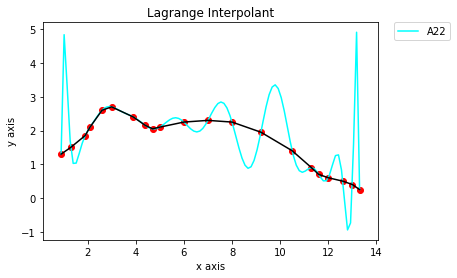

In [135]:
xs = [x[0] for x in px]
ys = [x[1] for x in px]

plt.title('Lagrange Interpolant')
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.plot(xs,ys,color='cyan', label="A22")
plt.scatter(x_val,y_val,color='red')
plt.plot(x_val,y_val,color='black')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
#D
import numpy as np
import matplotlib.pyplot as plt
import math

#takes in x data, y data,the two clamped boundary conditions, linspace(start,end,num)
def Clamped_Cubic_inter(x,y,start_derivative,end_derivative,linspace_start,linspace_end,num):
    #Step 0: a-vector
    xnodes = x 
    ynodes = y #ynodes = a-vector
    
    n = len(ynodes)
    #step 1: c-vector
    h = []
    for i in range(0,len(ynodes)-1):
        h.append(ynodes[i+1]-ynodes[i])

    A = np.zeros((n,n))
    #Clamped
    A[0][0] = 2*h[0]
    A[0][1] = h[0]
    for j in range(1,n-1):
        A[j][j-1] = h[j-1]
        A[j][j] = 2*(h[j-1]+h[j])
        A[j][j+1]= h[j]
    A[n-1][n-2] = h[-1] #h[-1] takes the last element of h
    A[n-1][n-1] = 2*h[-1]

    F = np.zeros((n,1))
    F[0] = 3/h[0]*(ynodes[1]-ynodes[0])-3*start_derivative
    for j in range(1,n-1):
        F[j] = 3*(ynodes[j+1]-ynodes[j])/h[j] - 3*(ynodes[j]-ynodes[j-1])/h[j-1]
    F[n-1] = -3/h[-1]*(ynodes[-1]-ynodes[-2])-3*end_derivative
    
    c = np.linalg.solve(A,F)

    #step 2: b-vector
    b = np.zeros((n,1))
    for j in range(0,n-1):
        b[j] = 1/h[j]*(ynodes[j+1]-ynodes[j]) - h[j]/3*(2*c[j]+c[j+1])
    
    #step 3: d-vector
    d = np.zeros((n,1))
    for j in range(0,n-1):
        d[j] = (c[j+1]-c[j]/(3*h[j]))
    
    #returns list of (x,S(x))
    ls = np.linspace(linspace_start,linspace_end,num)
    spline = []
    for i in ls:
        for j in range(0,len(xnodes)-1):
            if(i >= xnodes[j] and i <= xnodes[j+1]):
                sTemp = ynodes[j]+b[j]*(i-xnodes[j])+c[j]*(i-xnodes[j])**2+d[j]*(i-xnodes[j])**3
                spline.append((i, sTemp))
    
    return spline

In [168]:
curve1_data = [(1,3.0),(2,3.7),(5,3.9),(6,4.2),(7,5.7),(8,6.6),(10,7.1),(13,6.7),(17,4.5)]
curve2_data = [(17,4.5),(20,7.0),(23,6.1),(24,5.6),(25,5.8),(27,5.2),(27.7,4.1)]
curve3_data = [(27.7,4.1),(28,4.3),(29,4.1),(30,3.0)]

In [170]:
curve1 = Clamped_Cubic_inter([x[0] for x in curve1_data],[x[1] for x in curve1_data],1.0,-0.67,1,17,80)
print("A31")
for x,y in curve1:
    print(f"({x},{y})")

A31
(1.0,3.0)
(1.2025316455696202,3.188694705447031)
(1.4050632911392404,3.351271055611877)
(1.6075949367088609,3.490062337939032)
(1.810126582278481,3.6074018398729866)
(2.0126582278481013,3.705622807776792)
(2.2151898734177218,3.7868568192134693)
(2.4177215189873418,3.8525661939702682)
(2.620253164556962,3.904074601966829)
(2.8227848101265822,3.9427057131227916)
(3.0253164556962027,3.9697831973577964)
(3.2278481012658227,3.9866307245914827)
(3.430379746835443,3.994571964743492)
(3.632911392405063,3.9949305877334624)
(3.8354430379746836,3.9890302634810353)
(4.037974683544304,3.9781946619058504)
(4.240506329113924,3.9637474529275467)
(4.443037974683545,3.947012306465767)
(4.6455696202531644,3.929312892440149)
(4.848101265822785,3.9119728807703336)
(5.050632911392405,3.8963568705741047)
(5.253164556962025,3.888781893944846)
(5.455696202531645,3.905183344540108)
(5.658227848101266,3.962601704367371)
(5.860759493670886,4.078077455434114)
(6.063291139240507,4.268418742403086)
(6.2658227848

In [171]:
curve2 = Clamped_Cubic_inter([x[0] for x in curve2_data],[x[1] for x in curve2_data],3.0,-4.0,17,27.7,80)
print("A32")
for x,y in curve2:
    print(f"({x},{y})")

A32
(17.0,4.5)
(17.135443037974685,4.8864502914252235)
(17.270886075949367,5.234396826234122)
(17.406329113924052,5.545720436998731)
(17.541772151898734,5.822301956291053)
(17.67721518987342,6.0660222166831215)
(17.8126582278481,6.278762050746942)
(17.948101265822785,6.462402291054547)
(18.083544303797467,6.61882377017794)
(18.218987341772152,6.749907320689154)
(18.354430379746837,6.857533775160198)
(18.48987341772152,6.943583966163092)
(18.625316455696204,7.009938726269859)
(18.760759493670886,7.058478888052514)
(18.89620253164557,7.091085284083078)
(19.031645569620252,7.109638746933567)
(19.167088607594938,7.116020109176002)
(19.30253164556962,7.112110203382399)
(19.437974683544304,7.09978986212478)
(19.573417721518986,7.080939917975162)
(19.70886075949367,7.057441203505565)
(19.844303797468356,7.031174551288004)
(19.979746835443038,7.004020793894501)
(20.115189873417723,6.977632887456505)
(20.250632911392405,6.95222798185696)
(20.38607594936709,6.927465463714659)
(20.52151898734177,

In [172]:
curve3 = Clamped_Cubic_inter([x[0] for x in curve3_data],[x[1] for x in curve3_data],0.33,-1.5,27.7,30,30)
print("A33")
for x,y in curve3:
    print(f"({x},{y})")

A33
(27.7,4.1)
(27.779310344827586,4.138505557707902)
(27.858620689655172,4.194095712923897)
(27.93793103448276,4.255397930165726)
(28.017241379310345,4.311060664217639)
(28.09655172413793,4.353334635440665)
(28.175862068965518,4.382126637962496)
(28.255172413793105,4.39832278778495)
(28.334482758620688,4.40280920090984)
(28.413793103448274,4.396471993338987)
(28.49310344827586,4.380197281074206)
(28.572413793103447,4.354871180117314)
(28.651724137931033,4.32137980647013)
(28.73103448275862,4.280609276134469)
(28.810344827586206,4.233445705112149)
(28.889655172413793,4.180775209404986)
(28.96896551724138,4.123483905014799)
(29.048275862068966,4.062417248483633)
(29.127586206896552,3.997832778939052)
(29.20689655172414,3.92954570089015)
(29.286206896551725,3.857360416824821)
(29.365517241379308,3.7810813292309615)
(29.444827586206895,3.7005128405964567)
(29.52413793103448,3.6154593534092037)
(29.603448275862068,3.5257252701570962)
(29.682758620689654,3.4311149933280274)
(29.762068965517

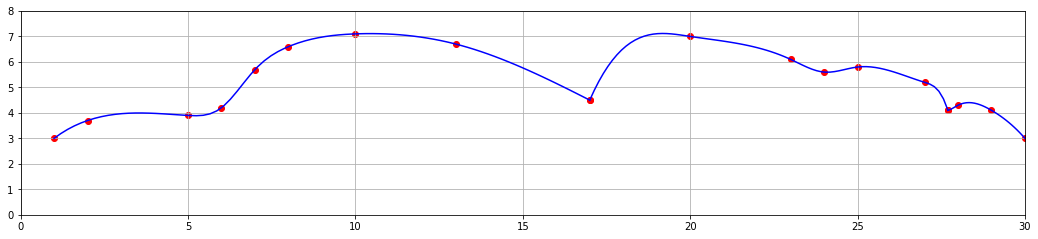

In [167]:
#plots cubic spline interpolant
plt.plot([x[0] for x in curve1],[x[1] for x in curve1],color='blue', label="A31")
plt.plot([x[0] for x in curve2],[x[1] for x in curve2],color='blue', label="A32")
plt.plot([x[0] for x in curve3],[x[1] for x in curve3],color='blue', label="A33")

#plots original data
plt.scatter([x[0] for x in curve1_data],[x[1] for x in curve1_data],color='red')
plt.scatter([x[0] for x in curve2_data],[x[1] for x in curve2_data],color='red')
plt.scatter([x[0] for x in curve3_data],[x[1] for x in curve3_data],color='red')

plt.gca().set_ylim([0,8])
plt.gca().set_xlim([0,30])
fig = plt.gcf()
fig.set_size_inches(18, 3.75)
plt.grid()
plt.show()